# Intro

Sometimes, you are searching for features specific to your visual understanding. In classification problems of time series, many features are related with their morphology. This morphology is sometimes very characteristic and can be used to differentiate classes of time series. Using your visual interpretation of what changes on the time series can be used to extract features and create a set of meaningful features. In this notebook, we will search for examples in how to implement that based on SSTS.

In [35]:
import sys
import os
import itertools

sys.path.insert(0, 'D:\PhD\Code\PhDProject')

#TOOLS
from tools.load_tools import loadH5
from tools.processing_tools import multi_smooth, mean_norm
from tools.string_processing_tools import runLengthEncoding, NgramsInt, WindowRLEString, chunkDataRLE, lstStr2Str, lcsDist, dynamic_lcs_accumulated
from tools.plot_tools import plot_textcolorized

#SKLEARN
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import average_precision_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.metrics import confusion_matrix

#GOT
from GrammarofTime.SSTS.backend.gotstools import *

#PYTS
from pyts import datasets

#Wordcloud to show images of words
from wordcloud import WordCloud

#textdistance package
import textdistance

#other functions
from definitions import CONFIG_PATH

#pandas
from pandas import read_json

#novainstrumentation
from novainstrumentation import smooth

#ipython display
from IPython.display import display
# %matplotlib notebook
%matplotlib inline

In [2]:
data = datasets.fetch_ucr_dataset("GunPoint", use_cache=True, data_home=None, return_X_y=False)

X_train = data["data_train"]
y_train = data["target_train"]

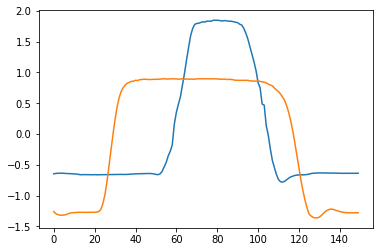

In [84]:
plt.plot(X_train[0])
plt.plot(X_train[6])

## Example 1 - Differenciate signals based on length of plateau


Space

Space
92


<IPython.core.display.Javascript object>


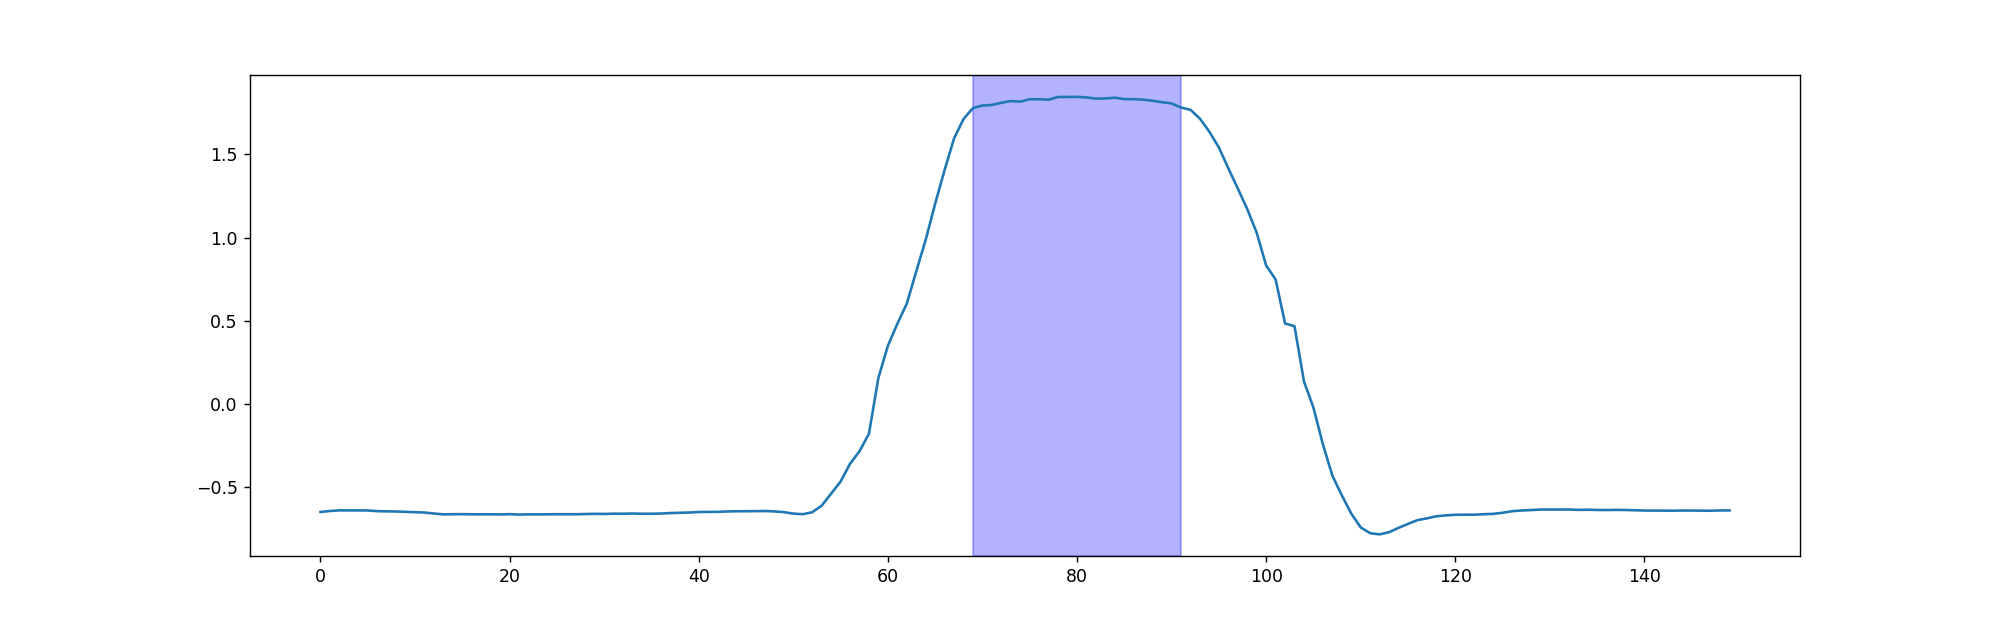

<IPython.core.display.Javascript object>


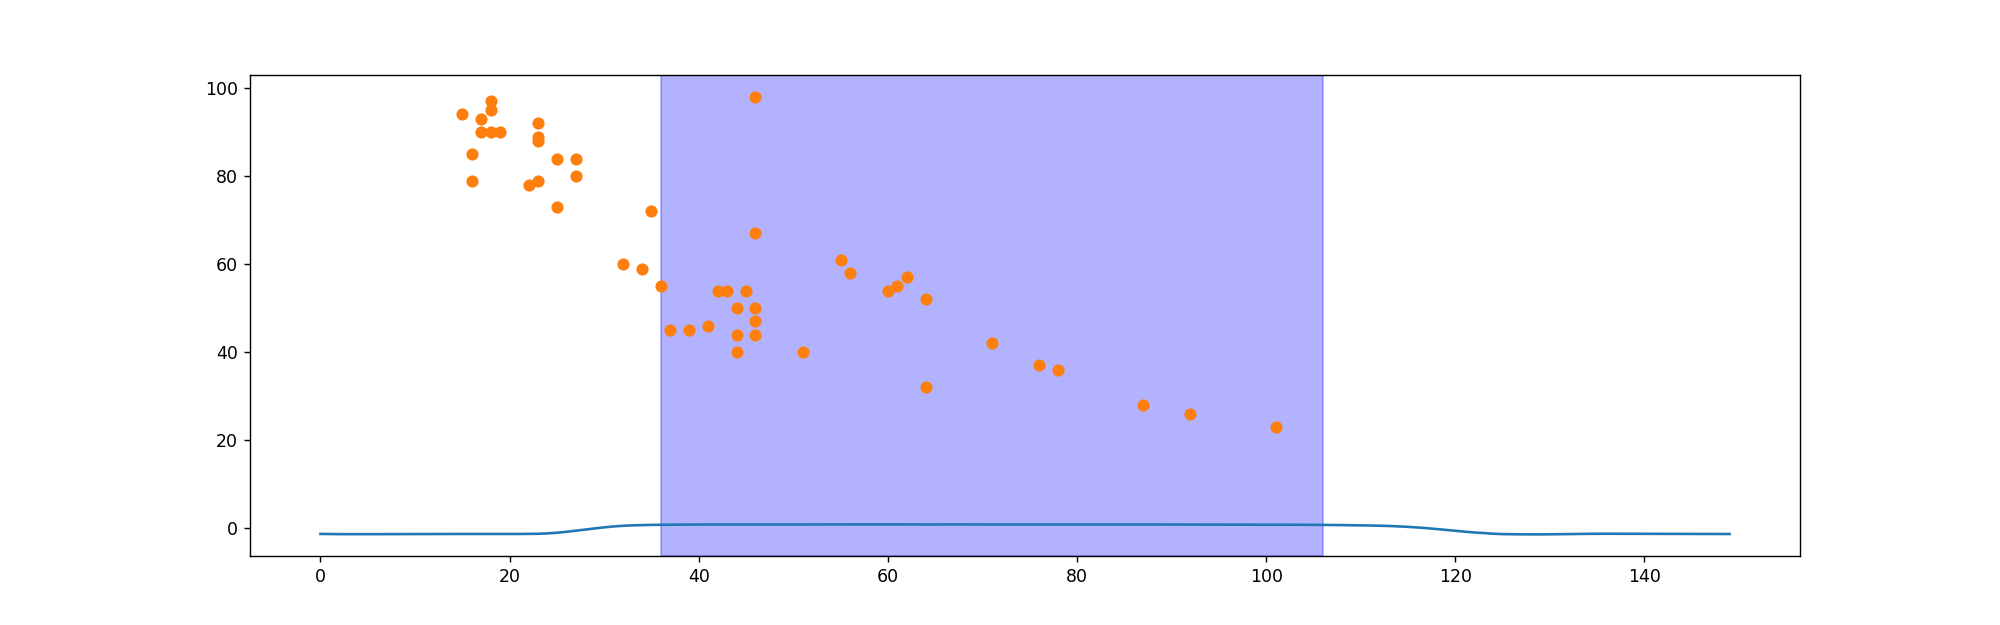

In [28]:
#Extract features that seem to differentiate the signals
#1 - Differentiate the signal based on the length of plateau
cfg = {
  "pre_processing": "",
  "connotation": "A 0.5 D1 0.05",
  "expression": "(1z)+"
}
matches1 = ssts(X_train[0], cfg)
matches2 = ssts(X_train[6], cfg)
print(matches1[0][1])
plot_matches(X_train[0], matches1, color="b", mode="span")
plot_matches(X_train[6], matches2, color="b", mode="span")


Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space

Space


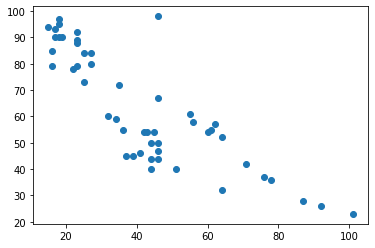

In [86]:
feat_vec1 = []
feat_vec2 = []

cfg_feat1 = {
  "pre_processing": "",
  "connotation": "A 0.5 D1 0.05",
  "expression": "(1z)+"
}

cfg_feat2 = {
  "pre_processing": "",
  "connotation": "A 0.5 D1 0.05",
  "expression": "(0z)+"
}

for sig_i in X_train:
    matches_feat1 = ssts(sig_i, cfg_feat1)
    matches_feat2 = ssts(sig_i, cfg_feat2)
    feat1_i = 0
    feat2_i = 0
    for match_i in matches_feat1:
        feat1_i += match_i[1]-match_i[0]
    for match_i in matches_feat2:
        feat2_i += match_i[1]-match_i[0]
    
    feat_vec1.append(feat1_i)
    feat_vec2.append(feat2_i)
    
plt.plot(feat_vec1, feat_vec2, 'o')
plt.show()

In [87]:
#Let us make a simple KMeans to cluster these features to see how it is clustered
from sklearn.cluster import KMeans

X = np.transpose(np.array([feat_vec1, feat_vec2]))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 0]


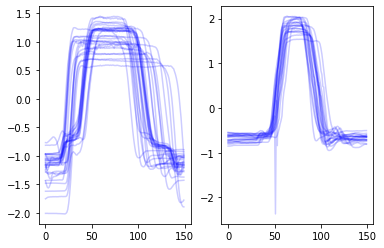

In [88]:
fig, axs = plt.subplots(1, len(np.unique(kmeans.labels_)))

for ax, label in zip(axs, np.unique(kmeans.labels_)):
    ax.plot(np.transpose(X_train[np.where(kmeans.labels_==label)[0]]), alpha=0.2, color="b")


## Example 2 - Differentiate signal based on presence of inflection on the signal's base


Space

Space


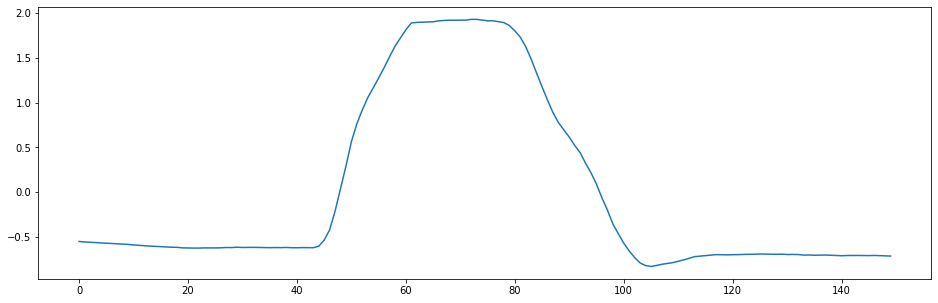

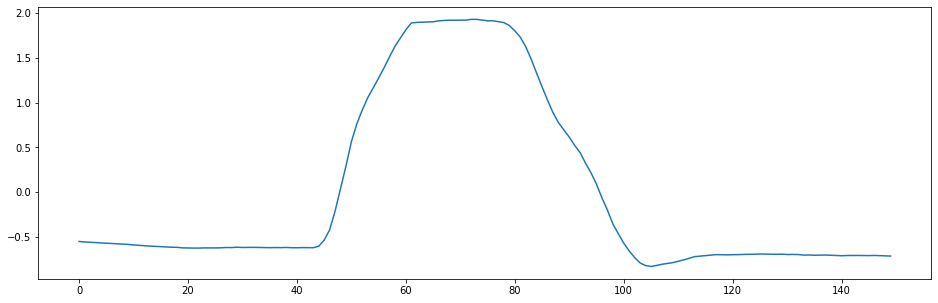

In [83]:
feat_vec1 = []
feat_vec2 = []

cfg_feat1 = {
  "pre_processing": "",
  "connotation": "AD 0.75",
  "expression": "1+"
#   "expression": "(0z)+(0p)+(0z)+"
}

cfg_feat2 = {
  "pre_processing": "",
  "connotation": "A 0.25 D1 0.025",
  "expression": "((0z)+(0n)+(0z))"
}

sig = X_train[5]
matches_feat1 = ssts(sig, cfg_feat1)
matches_feat2 = ssts(sig, cfg_feat2)

plot_matches(sig, matches_feat1, color="b", mode="span")
plot_matches(sig, matches_feat2, color="b", mode="span")

[1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 1 0 0 0 0 0 1 1 1 0 1]
[2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 2 2 1 2 1 2
 2 2 2 2 1 1 1 2 2 1 2 1 2]


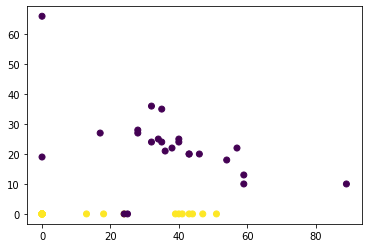

In [62]:
for sig_i in X_train:
    matches_feat1 = ssts(sig_i, cfg_feat1)
    matches_feat2 = ssts(sig_i, cfg_feat2)
    feat1_i = 0
    feat2_i = 0
    
    if(len(matches_feat1)==0):
        feat1_i += 0
    else:
        for match_i in matches_feat1:
            feat1_i += match_i[1]-match_i[0]
    if(len(matches_feat2)==0):
        feat2_i += 0
    else:
        for match_i in matches_feat2:
            feat2_i += match_i[1]-match_i[0]
    
    feat_vec1.append(feat1_i)
    feat_vec2.append(feat2_i)



X = np.transpose(np.array([feat_vec1]))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print(kmeans.labels_)
print(y_train)

# fig, axs = plt.subplots(1, len(np.unique(kmeans.labels_)))

# for ax, label in zip(axs, np.unique(kmeans.labels_)):
#     ax.plot(np.transpose(X_train[np.where(kmeans.labels_==label)[0]]), alpha=0.1, color="b")


plt.scatter(feat_vec1, feat_vec2, c=y_train)
plt.show()